# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Mouse_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
Mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [23]:
# Checking the number of mice.
number_of_mice = mouse_metadata['Mouse ID'].count()
number_of_mice

249

In [24]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.


In [25]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates = Mouse_data_complete[Mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = Mouse_data_complete.drop_duplicates(subset='Mouse ID')
cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


In [27]:
# Checking the number of mice in the clean DataFrame.
numbers_of_mice = cleaned_df['Mouse ID'].count()
numbers_of_mice

249

## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = Mouse_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem=lambda x: st.sem(x)  # Standard Error of the Mean using scipy.stats
)

In [29]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_adv = Mouse_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem=lambda x: st.sem(x)  # Standard Error of the Mean using scipy.stats
).reset_index()
summary_stats_adv

,Drug Regimen,mean,median,variance,std_dev,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

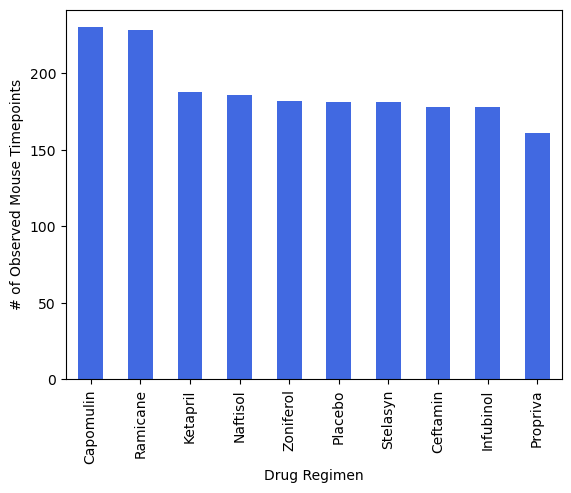

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = Mouse_data_complete.groupby('Drug Regimen').size()
# Sort the counts from largest to smallest
sorted_drug_counts = drug_counts.sort_values(ascending=False)
sorted_drug_counts.plot(kind='bar', color='royalblue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

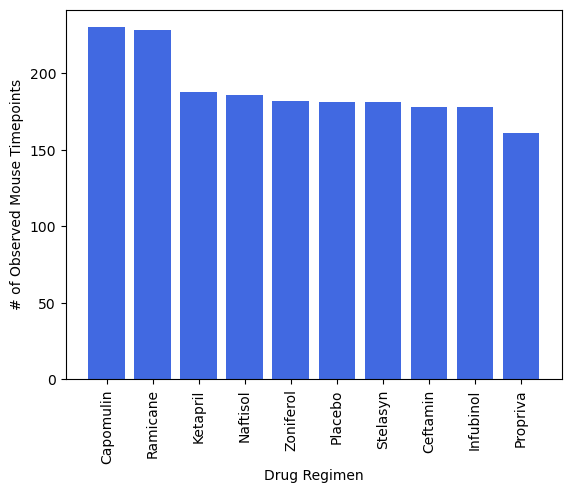

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts_py = Mouse_data_complete.groupby('Drug Regimen').size()

# Sort the counts from largest to smallest
sorted_drug_counts_py = drug_counts_py.sort_values(ascending=False)

# Create a bar plot using pyplot
plt.bar(sorted_drug_counts_py.index, sorted_drug_counts_py.values, color='royalblue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

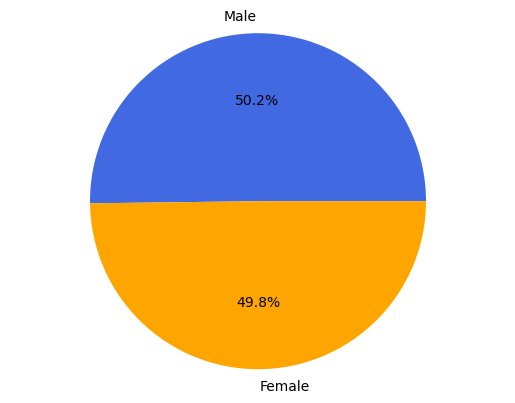

In [32]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = Mouse_data_complete[['Mouse ID', 'Sex']].drop_duplicates()
# Count the number of unique male and female mice
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',startangle=360, colors=['royalblue', 'orange'])
plt.axis('equal') 
plt.show()

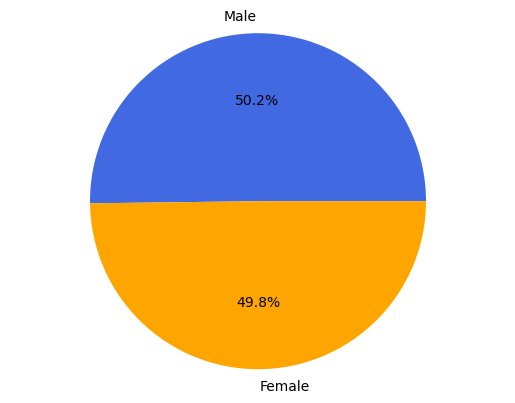

In [33]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_py = Mouse_data_complete[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of unique male and female mice
gender_counts_py = unique_mice_py['Sex'].value_counts()
# Make the pie chart
plt.pie(gender_counts_py, labels=gender_counts.index, autopct='%1.1f%%', startangle=360, colors=['royalblue', 'orange'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = Mouse_data_complete[Mouse_data_complete['Drug Regimen'].isin(treatment_regimens)]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_data = pd.merge(last_timepoints, filtered_data, on=['Mouse ID', 'Timepoint'])
final_tumor_volume = final_data[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
final_tumor_volume

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
...,...,...,...
95,y769,Ceftamin,68.594745
96,y793,Capomulin,31.896238
97,y865,Ceftamin,64.729837
98,z578,Ramicane,30.638696


In [35]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = final_tumor_volume['Drug Regimen'].unique().tolist() 

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:  # Add this line to loop over treatments
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]  # Replace 'Drug' with your actual column name for treatments
    tumor_volumes = subset['Tumor Volume (mm3)']  # Replace 'Tumor Volume' with your actual column name for tumor volumes

    # Add subset
    tumor_vol_data.append(tumor_volumes)

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = tumor_volumes.quantile(0.25)
    Q3 = tumor_volumes.quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify potential outliers
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f'Treatment: {treatment}')
    print(f'Potential outliers: {outliers.values}')

Treatment: Infubinol
Potential outliers: [36.3213458]
Treatment: Ceftamin
Potential outliers: []
Treatment: Ramicane
Potential outliers: []
Treatment: Capomulin
Potential outliers: []


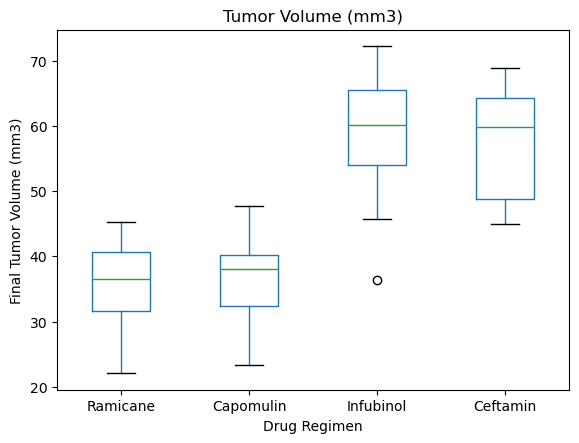

In [36]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
df_sorted = final_tumor_volume.sort_values(by='Tumor Volume (mm3)')
ordered_groups = df_sorted['Drug Regimen'].unique()
df_sorted['Drug Regimen'] = pd.Categorical(df_sorted['Drug Regimen'], categories=ordered_groups, ordered=True)
df_sorted.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', grid=False)
plt.suptitle('')  # Suppress the default title to avoid redundancy
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

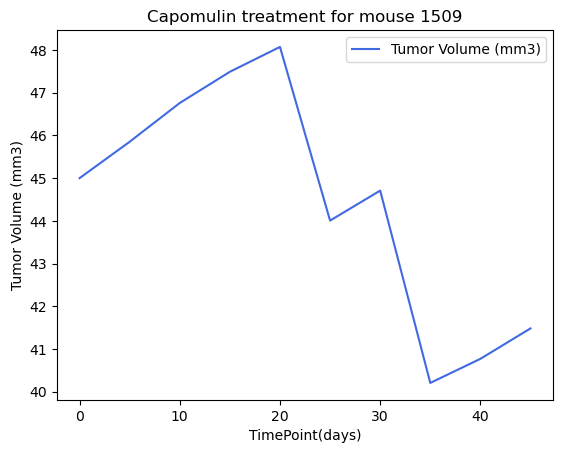

In [37]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Mouse_1509=Mouse_data_complete[Mouse_data_complete['Mouse ID'] =='l509']
# Plotting
Mouse_1509.plot(x='Timepoint', y='Tumor Volume (mm3)', kind='line', color='royalblue')
plt.title('Capomulin treatment for mouse 1509')
plt.xlabel('TimePoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

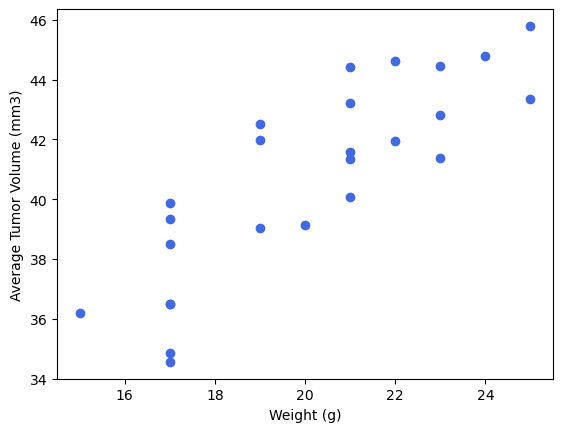

In [38]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = Mouse_data_complete[Mouse_data_complete['Drug Regimen'] == 'Capomulin']
# Group by mouse weight and calculate the average tumor volume
avg_tumor_volume = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'first'}).reset_index()
# Plotting
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'], color='royalblue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation coefficient is 0.84


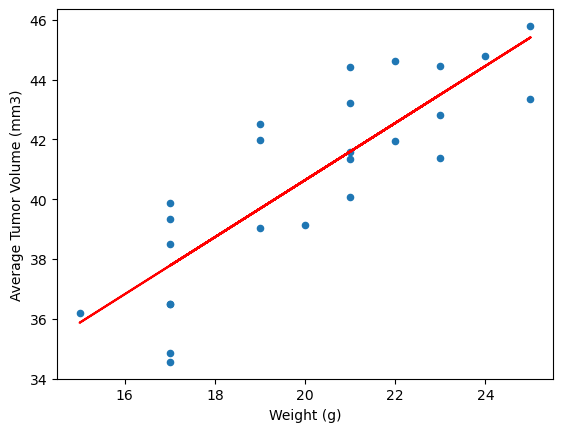

In [39]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = avg_tumor_volume['Weight (g)']
y_values = avg_tumor_volume['Tumor Volume (mm3)']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Calculate regression values
regress_value = x_values * slope + intercept

# Create the equation of the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot the data
avg_tumor_volume.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')
plt.plot(x_values, regress_value, "r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Print the correlation coefficient
print("The correlation coefficient is", round(rvalue, 2))

# Show the plot
plt.show()